# Lecture 6 - Temporal Data

Time is a surprisingly difficult thing to get right sometimes. The concept that seems straightforward, then Einstein comes along and tell us that [it's all relative](https://www.independent.co.uk/news/science/einsteins-theory-is-proved-and-it-is-bad-news-if-you-own-a-penthouse-2088195.html). While far more linear on a computer, dealing with time does sometimes feel like you're solving equations for quantium gravity. 

<img src="Einstein.jpg" alt="airplane" width="500"/>

The problem is that so many people store time differently. French Canada uses 24-hr notation, while us anglos tend to use 12-hour notation. Then there's that annonying American habit of using month-day-year, rather than day-month-year. Time zones are a pain. This is just the start of where problems begin. So let's start with some notation.

## Date coding notation in R

There are several options for dates and times, some of which have both. It is generally recommended to stick to the simplest level you need, so stick with dates if you just have dates, and times with times. The date-only package is `as.Date()`.

Because there are so many ways to keep track of time, high-level programming languages have date-time notation assoacited with them to handle and convert dates and times into a standardized format. In `as.Date()`, the notation is:

| Code | Value |
| ------------- |:-------------:|
| %d | Day of the month (decimal number) |
| %m | Month (decimal number) |
| %b | Month (abbreviated) |
| %B | Month (full name) |
| %y | Year (2 digit) |
| %Y | Year (4 digit) |

For each piece of data one might look at, a date object can be created by passing a string into the `as.Date()` function and specifying what it looks like (I also had to add the timezone on my computer):

In [2]:
as.Date('15/01/2001', format='%d/%m/%Y', tz='AST')

[1] "2001-01-15"

Having a standardized format makes it much easier to manipulate things that are dates. For example:

In [3]:
date1 = as.Date('15/1/2001', format='%d/%m/%Y', tz="America/Halifax")
date2 = as.Date('15/5/2001', format='%d/%m/%Y', tz='AST')

In [4]:
date1-date2

Time difference of -120 days

It's a good idea to specify the timezone where the time was collected as this will anchor time into a universal standard that can get ambiguous quickly (try sampling reefs on a trip across the Pacific and keeping track of what timezone you're in, or even what hemisphere, once you come back and look at the data). Timezones are a common pitfall, as names we use locally may not apply universally (everyone wants Eastern Standard Time it seems). The [full list](https://en.wikipedia.org/wiki/List_of_tz_database_time_zones) is long and can also be printed in R with:

In [7]:
str(OlsonNames())

 chr [1:593] "Africa/Abidjan" "Africa/Accra" "Africa/Addis_Ababa" ...
 - attr(*, "Version")= chr "2018e"


Dates are weird because there are a mixture of units of uneven size - 12 months, with a range of days in them that vary by year are not easy to follow. Let's say you want to know how many days there are between a series of sampling dates. Calculating this by hand would be a nightmare to have to do unless there was a date object to work it out for you. For example:

In [8]:
sample_dates = as.Date(c('2010-07-22', '2011-04-20', '2012-10-06', '2013-09-16', '2014-11-01', '2015-12-09', '2016-10-23', '2017-01-01', '2018-02-19'))

In [9]:
sample_dates

[1] "2010-07-22" "2011-04-20" "2012-10-06" "2013-09-16" "2014-11-01"
[6] "2015-12-09" "2016-10-23" "2017-01-01" "2018-02-19"

In [10]:
# Inter-date differences
diff(sample_dates)

Time differences in days
[1] 272 535 345 411 403 319  70 414

---
# Task 1
---

Figure out how many days passed between each of the assassinations of JFK, Malcolm X, MLK, and Bobby Kennedy in the 1960's.

In [13]:
# Your answer here (feel free to add cells to complete your answer)
assassination_dates = as.Date(c('1963-11-22', '1965-02-21', '1968-04-04', '1968-06-05'))

In [14]:
diff(assassination_dates)

Time differences in days
[1]  457 1138   62

Dates can also be created, not just manipulated, using basic R functions such as `seq()`, which makes a sequence of things:

In [15]:
my_dates = seq(date1, length=20, by='week')
my_dates

[1] "2001-01-15" "2001-01-22" "2001-01-29" "2001-02-05" "2001-02-12"
 [6] "2001-02-19" "2001-02-26" "2001-03-05" "2001-03-12" "2001-03-19"
[11] "2001-03-26" "2001-04-02" "2001-04-09" "2001-04-16" "2001-04-23"
[16] "2001-04-30" "2001-05-07" "2001-05-14" "2001-05-21" "2001-05-28"

In [16]:
diff(my_dates)

Time differences in days
 [1] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In most date systems, dates are really stored as integers, with some specific day in history being day zero. Excel famously uses 1900 but [wrongly identifying it as a leap year](https://en.wikipedia.org/wiki/Leap_year_bug) so as to maintain the Microsoft obsession with backward compatability. In R, 1 January 1970 is year zero, following the tradition of [Unix](https://www.wired.com/2001/09/unix-tick-tocks-to-a-billion/).

To look at the integer day for a datetime:
unclass turns dates into integers

In [17]:
unclass(my_dates)

[1] 11337 11344 11351 11358 11365 11372 11379 11386 11393 11400 11407 11414
[13] 11421 11428 11435 11442 11449 11456 11463 11470

In [18]:
diff(unclass(my_dates))

[1] 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7 7

In addition to turning dates into numbers, `as.Date()` can also turn numbers into words. A few convenience functions:

In [19]:
weekdays(sample_dates)

[1] "Thursday"  "Wednesday" "Saturday"  "Monday"    "Saturday"  "Wednesday"
[7] "Sunday"    "Sunday"    "Monday"

In [20]:
months(sample_dates)

[1] "July"      "April"     "October"   "September" "November"  "December" 
[7] "October"   "January"   "February"

In [21]:
quarters(sample_dates)

[1] "Q3" "Q2" "Q4" "Q3" "Q4" "Q4" "Q4" "Q1" "Q1"

There is also this odd thing: 

In [22]:
julian(sample_dates)

[1] 14812 15084 15619 15964 16375 16778 17097 17167 17581
attr(,"origin")
[1] "1970-01-01"

Which returns the days since time zero:

In [23]:
unclass(sample_dates)

[1] 14812 15084 15619 15964 16375 16778 17097 17167 17581

'Julian' here refers to the Julian calendar declared by Julias Caesar in 46 BC, use of which has continued from early adoption by astronomers due to the coincidence of three astronomical cycles on Monday, January 1, 4713 BC (which preceded any dates in recorded history).

# Dates *and* times

If you also have times in your data (datetime data), you can create a `POSIX` object. The name POSIX is an acronym for [Portable Operating System Interface](https://en.wikipedia.org/wiki/POSIX) (not sure where the 'X' came from) which is a set of standards for maintaining compatability of computer systems. POSIX notation adds additional arguments to how things are specified:

| Code | Meaning | Code | Meaning |
| ------------- |:-------------:|:-------------:|:-------------:|
| %a | Abbreviated weekday | %A | Full weekday |
| %b | Abbreviated month | %B | Full month |
| %c | Locale-specific date and time | %d | Decimal date |
| %H | Decimal hours (24 hour) | %I | Decimal hours (12 hour) |
| %j | Decimal day of the year | %m | Decimal month |
| %M | Decimal minute | %p | Locale-specific AM/PM |
| %S | Decimal second | %U | Decimal week of the year (starting on Sunday) |
| %w | Decimal Weekday (0=Sunday) | %W | Decimal week of the year (starting on Monday) |
| %x | Locale-specific Date | %X | Locale-specific Time |
| %y | 2-digit year | %Y | 4-digit year |
| %z | Offset from GMT | %Z | Time zone (character) |

Reflecting the various time components and conventions that people use gobally.

In R, the POSIX conversions for datetime objects is handled by two functions:

1. `as.POSIXct()` catenate time - which creates an atomic object of the number of seconds since time zero
2. `as.POSIXlt()` list time - which is a list of time attributes

We can have a look at thse things by creating two, seemingly identical objects:

In [24]:
time1 = as.POSIXct("2013-07-24 23:55:26")
time2 = as.POSIXlt("2013-07-24 23:55:26")

In [25]:
time1

[1] "2013-07-24 23:55:26 ADT"

In [26]:
time2

[1] "2013-07-24 23:55:26 ADT"

In [27]:
unclass(time1)

[1] 1374720926
attr(,"tzone")
[1] ""

In [28]:
unclass(time2)

$sec
[1] 26

$min
[1] 55

$hour
[1] 23

$mday
[1] 24

$mon
[1] 6

$year
[1] 113

$wday
[1] 3

$yday
[1] 204

$isdst
[1] 1

$zone
[1] "ADT"

$gmtoff
[1] NA

Because lists have more overhead computationally, unless you need the mixed categories, the best course is to stick with using `as.POSIXct`, where all the conversions are handled behind the scenes.

`POSIXct` objects work a little more intutively than the `as.Date` objects above:

In [29]:
time1-time2

Time difference of 0 secs

The fact that these work with seconds mean you can add to them coherently, provided you convert to seconds first:

In [30]:
time1

[1] "2013-07-24 23:55:26 ADT"

In [31]:
time1+24*60*60

[1] "2013-07-25 23:55:26 ADT"

---
# Task 2
---

Creat two `POSIXct` objects to calculate the number of **decimal hours** between the launch and landing of Apollo 11. 

In [32]:
# Your answer here (feel free to add cells to complete your answer)
launch_date = as.POSIXct("1969-07-16 13:32:00")
landing_date = as.POSIXct("1969-07-24 16:50:35")

In [33]:
landing_date - launch_date

Time difference of 8.137905 days

Importantly, `POSIXct` objects will keep track of daylight savings time, which is applied willy-nilly among provinces, states, and countries.

In [34]:
as.POSIXct("2013-03-10 08:32:07") - as.POSIXct("2013-03-09 23:55:26")

Time difference of 7.611389 hours

Note this will use the local timezone on the computer unless otherwise specfied, and that POSIX-style timezones are a HUGE pain to use, so be forewarned it might take some time to track down the correct POSIX timezone. Best practice is to just use GMT (or  equivalently UMT) when you're recording scientific data that needs a time component. Greenwich Mean Time doesn't change with the seasons and is the time at the [Shepherd Gate Clock](https://www.rmg.co.uk/see-do/we-recommend/attractions/shepherd-gate-clock), at the Royal Observatory in Greenwich, UK. This is worth visiting if you're in London, as it is anchor location of the prime meridian, against which all time and longitude is anchored globally. It also houses John Harrison's chronometers, which are the basis of how longitude was established. 

## `strptime()`

Finally there is also the `strptime` function, which is an internal workhorse function to take a string and convert it into a time data type:

In [35]:
# Create data frame
events = data.frame(
    time=c("2014-01-23 14:28:21","2014-01-23 14:28:55","2014-01-23 14:29:02","2014-01-23 14:31:18"),
    speed=c(2.0,2.2,3.4,5.5))

In [36]:
events

time,speed
2014-01-23 14:28:21,2.0
2014-01-23 14:28:55,2.2
2014-01-23 14:29:02,3.4
2014-01-23 14:31:18,5.5


In [37]:
summary(events)

                  time       speed      
 2014-01-23 14:28:21:1   Min.   :2.000  
 2014-01-23 14:28:55:1   1st Qu.:2.150  
 2014-01-23 14:29:02:1   Median :2.800  
 2014-01-23 14:31:18:1   Mean   :3.275  
                         3rd Qu.:3.925  
                         Max.   :5.500  

In [38]:
# Change time to an actual time object
events$time = strptime(events$time,"%Y-%m-%d %H:%M:%S")

In [39]:
summary(events)

      time                         speed      
 Min.   :2014-01-23 14:28:21   Min.   :2.000  
 1st Qu.:2014-01-23 14:28:46   1st Qu.:2.150  
 Median :2014-01-23 14:28:58   Median :2.800  
 Mean   :2014-01-23 14:29:24   Mean   :3.275  
 3rd Qu.:2014-01-23 14:29:36   3rd Qu.:3.925  
 Max.   :2014-01-23 14:31:18   Max.   :5.500  

The problem with strptime is that it makes some assumptions that might mess things up for you if they go undetected. For example:

In [40]:
# Create some times
early = strptime("2000-01-01 00:00:00","%Y-%m-%d %H:%M:%S")
late1 = strptime("2000-01-01 00:00:20","%Y-%m-%d %H:%M:%S")

early-late1

Time difference of -20 secs

In [41]:
# Create some other times
early = strptime("2000-01-01 00:00:00","%Y-%m-%d %H:%M:%S")
late2 = strptime("2000-01-01 1:00:00","%Y-%m-%d %H:%M:%S")

early-late2

Time difference of -1 hours

This might mess you up if you're scripting to extract times for example:

In [42]:
as.numeric(early-late1)
as.numeric(early-late2)

[1] -20

[1] -1

## System internals


R will also provide information about what it is borrowing from your operating system to decide what time it is:

In [43]:
Sys.time()

[1] "2018-10-10 09:41:04 ADT"

Notice what time zone is specified, and how this might (or might not) differ from what your current local time is. That is given by

In [44]:
date()

[1] "Wed Oct 10 09:41:19 2018"

## Temporal dataframes

Most often, we won't create dates and times by hand. Instead we will import them from a flat file. [Here](http://www.urban-climate.net/content/data/9-data) we can download daily wind and rainfall data for London. 

---
# Task 3
---

Download weather data for Southwark, London for 2016 and, using the Date.and.Time column timestamp, calculate the average length of time (in hours) between gale force (i.e. >34 kts) maximum gust records.

In [78]:
# Your answer here (feel free to add cells to complete your answer)
weather = read.csv('Weather_Data_2016.csv')
names(weather)

[1] "Date.and.Time"                   "Battery.Voltage"                
 [3] "CR10.Temperature"                "Wind.Direction.10.Minutes"      
 [5] "Wind.Speed.10.Minutes"           "Wind.Gust.10.Minutes"           
 [7] "Hourly.Average.Direction"        "Hourly.Average.Speed"           
 [9] "Hourly.Maximum.Gust"             "Hourly.Gust.Time"               
[11] "Hourly.Gust.Direction"           "Last.Minute.Average.Temperature"
[13] "Total.Hourly.Rain"               "Average.RH.over.previous.minute"
[15] "Maximum.Hourly.Air.Temperature"  "Minimum.Hourly.Air.Temperature" 
[17] "Maximum.Hourly.Rainfall.Rate"    "Time.of.Rainfall"

In [135]:
weather$time = strptime(weather$'Date.and.Time', format = "%d/%m/%Y %H:%M")
weather$time

   [1] "2016-01-01 00:00:00 AST" "2016-01-01 01:00:00 AST"
   [3] "2016-01-01 02:00:00 AST" "2016-01-01 03:00:00 AST"
   [5] "2016-01-01 04:00:00 AST" "2016-01-01 05:00:00 AST"
   [7] "2016-01-01 06:00:00 AST" "2016-01-01 07:00:00 AST"
   [9] "2016-01-01 08:00:00 AST" "2016-01-01 09:00:00 AST"
  [11] "2016-01-01 10:00:00 AST" "2016-01-01 11:00:00 AST"
  [13] "2016-01-01 12:00:00 AST" "2016-01-01 13:00:00 AST"
  [15] "2016-01-01 14:00:00 AST" "2016-01-01 15:00:00 AST"
  [17] "2016-01-01 16:00:00 AST" "2016-01-01 17:00:00 AST"
  [19] "2016-01-01 18:00:00 AST" "2016-01-01 19:00:00 AST"
  [21] "2016-01-01 20:00:00 AST" "2016-01-01 21:00:00 AST"
  [23] "2016-01-01 22:00:00 AST" "2016-01-01 23:00:00 AST"
  [25] "2016-01-02 00:00:00 AST" "2016-01-02 01:00:00 AST"
  [27] "2016-01-02 02:00:00 AST" "2016-01-02 03:00:00 AST"
  [29] "2016-01-02 04:00:00 AST" "2016-01-02 05:00:00 AST"
  [31] "2016-01-02 06:00:00 AST" "2016-01-02 07:00:00 AST"
  [33] "2016-01-02 08:00:00 AST" "2016-01-02 09:00:00 AS

In [141]:
X = weather$time[weather$Hourly.Maximum.Gust>34]
diff(X)

Time differences in hours
  [1]    1    1    1   51    1  405    1   18    7   36    2    1    1    1    1
 [16]    1    1    9    1    1    2    1    2   52    1    3    2    1    2    1
 [31]    1    1    1    2   15   91    1    1    1    1    1    1    1    1    1
 [46]    1    1    2   17    3    1    2    1    6    3    1    1    1    1    1
 [61]    1    1    1    1    1    1    1  286    1    1   16    1    2  217    1
 [76]   19    1    1    1    1    9    1    1  563    2    1   16    3    2    8
 [91]    1    1    1    1    1    1    1    1    1    1    1    1    1  216    2
[106]    1  549  750 1964 1105 1030    2    2  108    8

## Plotting time

Once a datetime object has been created, it becomes easier to plot as well.

In [109]:
datex = data.frame('time'=as.POSIXct(c("2009-03-07 12:00", "2009-03-08 12:00", "2009-03-28 12:00", "2009-03-29 12:00", "2009-10-24 12:00", "2009-10-25 12:00", "2009-10-31 12:00", "2009-11-01 12:00")), 'values' = c(2, 4, 2, 6, 3, 6, 1, 1))

In [110]:
datex

time,values
2009-03-07 12:00:00,2
2009-03-08 12:00:00,4
2009-03-28 12:00:00,2
2009-03-29 12:00:00,6
2009-10-24 12:00:00,3
2009-10-25 12:00:00,6
2009-10-31 12:00:00,1
2009-11-01 12:00:00,1


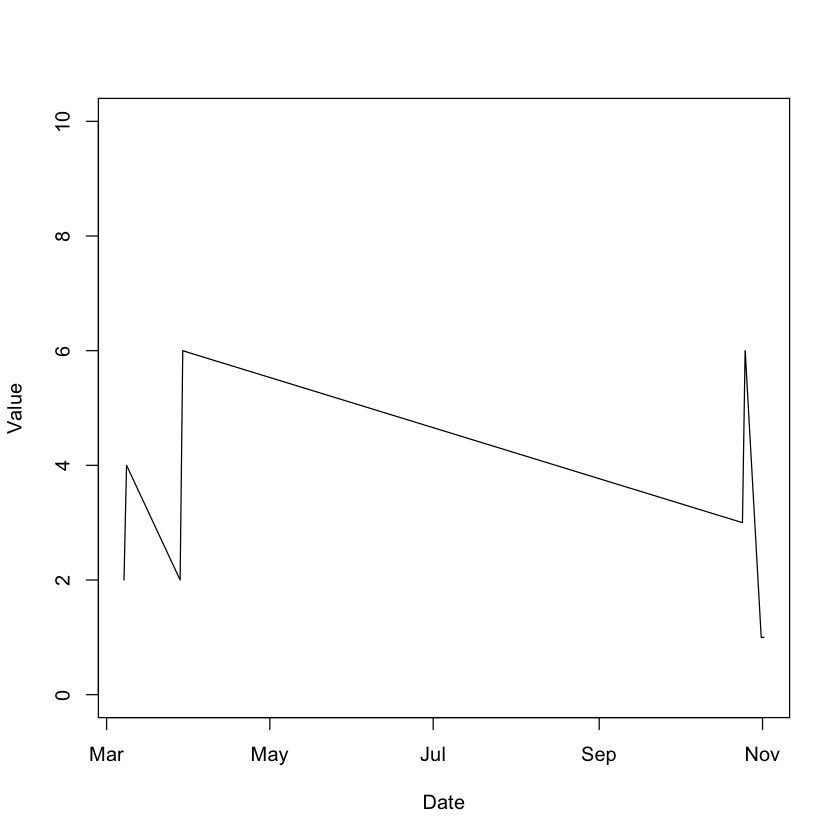

In [125]:
plot(datex$time, datex$values, type='l', ylim=c(0,10), xlab='Date', ylab='Value')

In [152]:
?plot

---
# Task 4
---

Using the Southwark 2016 data, plot wind gusts through time. Use `abline()` to plot a line at >34 kts.

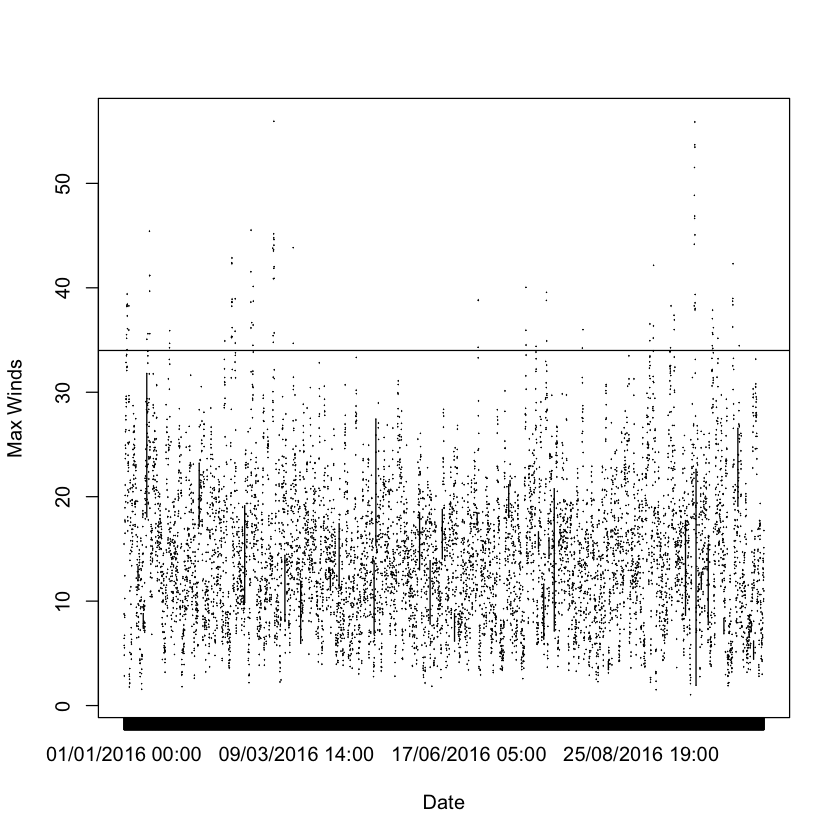

In [155]:
# Your answer here (feel free to add cells to complete your answer
plot(weather$Date.and.Time, weather$Hourly.Maximum.Gust, type='1', xlab='Date', ylab='Max Winds')
abline(h=34)

## Time filtering

Frequently we like to select key dates in a dataset, and filtering by date or by time is required. Fortunately we can apply the same kinds of boolean operators as we saw in Lecture 2:

In [129]:
date_seq = seq(c(ISOdate(2000,3,20)), by = "DSTday", length.out = 31)
date_seq


 [1] "2000-03-20 08:00:00 AST" "2000-03-21 08:00:00 AST"
 [3] "2000-03-22 08:00:00 AST" "2000-03-23 08:00:00 AST"
 [5] "2000-03-24 08:00:00 AST" "2000-03-25 08:00:00 AST"
 [7] "2000-03-26 08:00:00 AST" "2000-03-27 08:00:00 AST"
 [9] "2000-03-28 08:00:00 AST" "2000-03-29 08:00:00 AST"
[11] "2000-03-30 08:00:00 AST" "2000-03-31 08:00:00 AST"
[13] "2000-04-01 08:00:00 AST" "2000-04-02 08:00:00 ADT"
[15] "2000-04-03 08:00:00 ADT" "2000-04-04 08:00:00 ADT"
[17] "2000-04-05 08:00:00 ADT" "2000-04-06 08:00:00 ADT"
[19] "2000-04-07 08:00:00 ADT" "2000-04-08 08:00:00 ADT"
[21] "2000-04-09 08:00:00 ADT" "2000-04-10 08:00:00 ADT"
[23] "2000-04-11 08:00:00 ADT" "2000-04-12 08:00:00 ADT"
[25] "2000-04-13 08:00:00 ADT" "2000-04-14 08:00:00 ADT"
[27] "2000-04-15 08:00:00 ADT" "2000-04-16 08:00:00 ADT"
[29] "2000-04-17 08:00:00 ADT" "2000-04-18 08:00:00 ADT"
[31] "2000-04-19 08:00:00 ADT"

In [130]:
date_seq[date_seq>"2000-03-24" & date_seq<"2000-04-04"]

 [1] "2000-03-24 08:00:00 AST" "2000-03-25 08:00:00 AST"
 [3] "2000-03-26 08:00:00 AST" "2000-03-27 08:00:00 AST"
 [5] "2000-03-28 08:00:00 AST" "2000-03-29 08:00:00 AST"
 [7] "2000-03-30 08:00:00 AST" "2000-03-31 08:00:00 AST"
 [9] "2000-04-01 08:00:00 AST" "2000-04-02 08:00:00 ADT"
[11] "2000-04-03 08:00:00 ADT"

In [158]:
class(weather)

[1] "data.frame"

---
# Task 5
---

Again, using the Southwark 2016 data, plot the **maximum daily** wind gust speed for the month of January.

In [164]:
# Your answer here (feel free to add cells to complete your answer)
A = weather$Date.and.Time


[1] 01/01/2016 00:00 01/01/2016 01:00 01/01/2016 02:00 01/01/2016 03:00
   [5] 01/01/2016 04:00 01/01/2016 05:00 01/01/2016 06:00 01/01/2016 07:00
   [9] 01/01/2016 08:00 01/01/2016 09:00 01/01/2016 10:00 01/01/2016 11:00
  [13] 01/01/2016 12:00 01/01/2016 13:00 01/01/2016 14:00 01/01/2016 15:00
  [17] 01/01/2016 16:00 01/01/2016 17:00 01/01/2016 18:00 01/01/2016 19:00
  [21] 01/01/2016 20:00 01/01/2016 21:00 01/01/2016 22:00 01/01/2016 23:00
  [25] 02/01/2016 00:00 02/01/2016 01:00 02/01/2016 02:00 02/01/2016 03:00
  [29] 02/01/2016 04:00 02/01/2016 05:00 02/01/2016 06:00 02/01/2016 07:00
  [33] 02/01/2016 08:00 02/01/2016 09:00 02/01/2016 10:00 02/01/2016 11:00
  [37] 02/01/2016 12:00 02/01/2016 13:00 02/01/2016 14:00 02/01/2016 15:00
  [41] 02/01/2016 16:00 02/01/2016 17:00 02/01/2016 18:00 02/01/2016 19:00
  [45] 02/01/2016 20:00 02/01/2016 21:00 02/01/2016 22:00 02/01/2016 23:00
  [49] 03/01/2016 00:00 03/01/2016 01:00 03/01/2016 02:00 03/01/2016 03:00
  [53] 03/01/2016 04:00 03/01/2016 05:00 03/01/2016 06:00 03/01/2016 07:00
  [57] 03/01/2016 08:00 03/01/2016 09:00 03/01/2016 10:00 03/01/2016 11:00
  [61] 03/01/2016 12:00 03/01/2016 13:00 03/01/2016 14:00 03/01/2016 15:00
  [65] 03/01/2016 16:00 03/01/2016 17:00 03/01/2016 18:00 03/01/2016 19:00
  [69] 03/01/2016 20:00 03/01/2016 21:00 03/01/2016 22:00 03/01/2016 23:00
  [73] 04/01/2016 00:00 04/01/2016 01:00 04/01/2016 02:00 04/01/2016 03:00
  [77] 04/01/2016 04:00 04/01/2016 05:00 04/01/2016 06:00 04/01/2016 07:00
  [81] 04/01/2016 08:00 04/01/2016 09:00 04/01/2016 10:00 04/01/2016 11:00
  [85] 04/01/2016 12:00 04/01/2016 13:00 04/01/2016 14:00 04/01/2016 15:00
  [89] 04/01/2016 16:00 04/01/2016 17:00 04/01/2016 18:00 04/01/2016 19:00
  [93] 04/01/2016 20:00 04/01/2016 21:00 04/01/2016 22:00 04/01/2016 23:00
  [97] 05/01/2016 00:00 05/01/2016 01:00 05/01/2016 02:00 05/01/2016 03:00
 [101] 05/01/2016 04:00 05/01/2016 05:00 05/01/2016 06:00 05/01/2016 07:00
 [105] 05/01/2016 08:00 05/01/2016 09:00 05/01/2016 10:00 05/01/2016 11:00
 [109] 05/01/2016 12:00 05/01/2016 13:00 05/01/2016 14:00 05/01/2016 15:00
 [113] 05/01/2016 16:00 05/01/2016 17:00 05/01/2016 18:00 05/01/2016 19:00
 [117] 05/01/2016 20:00 05/01/2016 21:00 05/01/2016 22:00 05/01/2016 23:00
 [121] 06/01/2016 00:00 06/01/2016 01:00 06/01/2016 02:00 06/01/2016 03:00
 [125] 06/01/2016 04:00 06/01/2016 05:00 06/01/2016 06:00 06/01/2016 07:00
 [129] 06/01/2016 08:00 06/01/2016 09:00 06/01/2016 10:00 06/01/2016 11:00
 [133] 06/01/2016 12:00 06/01/2016 13:00 06/01/2016 14:00 06/01/2016 15:00
 [137] 06/01/2016 16:00 06/01/2016 17:00 06/01/2016 18:00 06/01/2016 19:00
 [141] 06/01/2016 20:00 06/01/2016 21:00 06/01/2016 22:00 06/01/2016 23:00
 [145] 07/01/2016 00:00 07/01/2016 01:00 07/01/2016 02:00 07/01/2016 03:00
 [149] 07/01/2016 04:00 07/01/2016 05:00 07/01/2016 06:00 07/01/2016 07:00
 [153] 07/01/2016 08:00 07/01/2016 09:00 07/01/2016 10:00 07/01/2016 11:00
 [157] 07/01/2016 12:00 07/01/2016 13:00 07/01/2016 14:00 07/01/2016 15:00
 [161] 07/01/2016 16:00 07/01/2016 17:00 07/01/2016 18:00 07/01/2016 19:00
 [165] 07/01/2016 20:00 07/01/2016 21:00 07/01/2016 22:00 07/01/2016 23:00
 [169] 08/01/2016 00:00 08/01/2016 01:00 08/01/2016 02:00 08/01/2016 03:00
 [173] 08/01/2016 04:00 08/01/2016 05:00 08/01/2016 06:00 08/01/2016 07:00
 [177] 08/01/2016 08:00 08/01/2016 09:00 08/01/2016 10:00 08/01/2016 11:00
 [181] 08/01/2016 12:00 08/01/2016 13:00 08/01/2016 14:00 08/01/2016 15:00
 [185] 08/01/2016 16:00 08/01/2016 17:00 08/01/2016 18:00 08/01/2016 19:00
 [189] 08/01/2016 20:00 08/01/2016 21:00 08/01/2016 22:00 08/01/2016 23:00
 [193] 09/01/2016 00:00 09/01/2016 01:00 09/01/2016 02:00 09/01/2016 03:00
 [197] 09/01/2016 04:00 09/01/2016 05:00 09/01/2016 06:00 09/01/2016 07:00
 [201] 09/01/2016 08:00 09/01/2016 09:00 09/01/2016 10:00 09/01/2016 11:00
 [205] 09/01/2016 12:00 09/01/2016 13:00 09/01/2016 14:00 09/01/2016 15:00
 [209] 09/01/2016 16:00 09/01/2016 17:00 09/01/2016 18:00 09/01/2016 19:00
 [213] 09/01/2016 20:00 09/0

# What have you learned and what's next?

The point of today's lab was to learn about dates and times, and how to do them right

**You should at this point be comfortable:**
 1. Understanding that local customs make time hard
 2. Knowing how to create a date or time object
 3. Performing operations on date or time objects
 4. Filtering time

Next week we will work with words - DNA is a string!


---
# ** A bientôt ** !